<a href="https://colab.research.google.com/github/GianmarcoAndreana/NNDL/blob/main/WDBC_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's have a look at this dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [76]:
####################
#wget file
####################
!wget https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
!unzip breast+cancer+wisconsin+diagnostic.zip
!ls
#!cat wdbc.data
#!cat wdbc.names

--2025-02-25 13:57:27--  https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘breast+cancer+wisconsin+diagnostic.zip.2’

breast+cancer+wisco     [ <=>                ]  50.08K  --.-KB/s    in 0.1s    

2025-02-25 13:57:28 (353 KB/s) - ‘breast+cancer+wisconsin+diagnostic.zip.2’ saved [51284]

Archive:  breast+cancer+wisconsin+diagnostic.zip
replace wdbc.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: wdbc.data               
replace wdbc.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: wdbc.names              
breast+cancer+wisconsin+diagnostic.zip	  perceptron_training_intervals.gif  wdbc.names
breast+cancer+wisconsin+diagnostic.zip.1  sample_data
breast+cancer+wisconsin+diagnostic.zip.2  wdbc.data


In [30]:
####################
#import to pandas
####################
import pandas as pd

# Load the dataset to inspect its contents
file_path = 'wdbc.data'
data = pd.read_csv(file_path, header=None)

# Assign column names based on the Breast Cancer Wisconsin dataset documentation
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data.columns = columns

# Display the first few rows to understand the structure
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
####################
#convert data to numpy
####################
import numpy as np

# Convert the diagnosis column into numerical values for plotting (M = 1, B = -1)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': -1})

# Extract features&labels from pandas df and convert to numpy arrays (.value)
X = data[['Feature_1', 'Feature_2']].values
y = data['Diagnosis'].values

#NOTE: X is a 569 x 2 matrix: a row per sample, a column per feature

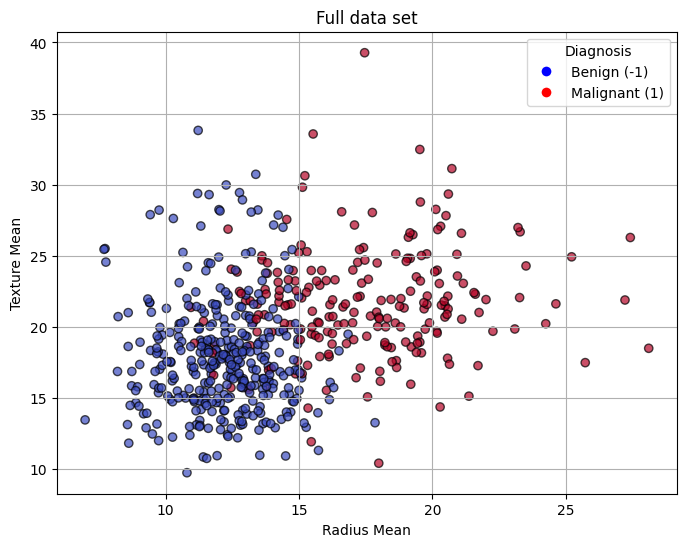

In [32]:
########################################
#plot the data set
########################################
import matplotlib.pyplot as plt

# Plot: create the figure object
plt.figure(figsize=(8, 6))

# Plot: set up scatter plot
scatter = plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='k'
)

# Legend
#plt.colorbar(scatter, label='Diagnosis (Malignant=1, Benign=-1)')

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Malignant (1)')
]
plt.legend(handles=handles, title='Diagnosis')

plt.title('Full data set')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.grid(True)
plt.show()

In [5]:
########################################
#solve classification problem
########################################
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Standardize the data to 0 mean and unit std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets: 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Create SVM classifier object (no kernel); C is the reg. param (+C =  -margin)
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the SVM classifier
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

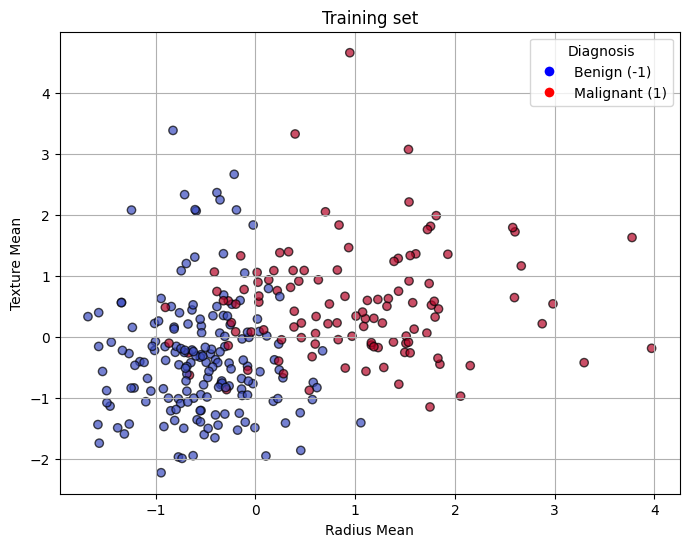

In [ ]:
########################################
#plot the training set
########################################

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train[:,0],
    X_train[:,1],
    c=y_train,
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='k'
)

# Legend
#plt.colorbar(scatter, label='Diagnosis (Malignant=1, Benign=-1)')

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Malignant (1)')
]
plt.legend(handles=handles, title='Diagnosis')


plt.title('Training set')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.grid(True)
plt.show()

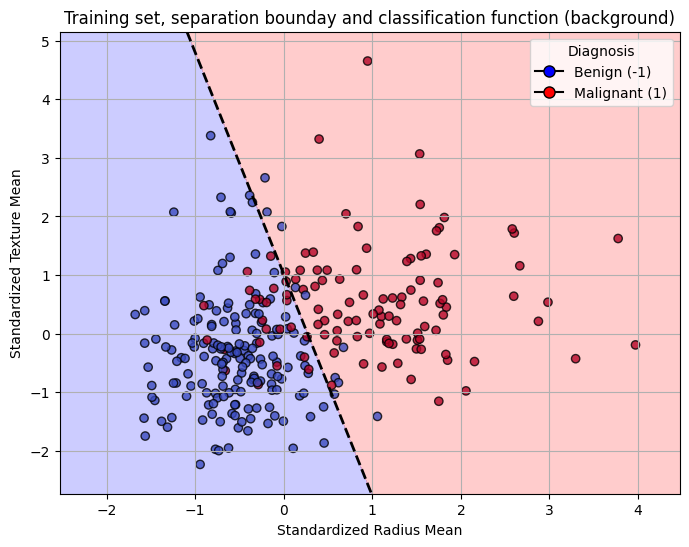

In [ ]:
##############################################################
#plot the learned classification function and the training set
##############################################################

# Create a meshgrid to plot the solution
# X_scaled[:, i].min() and X_scaled[:, i].max() are the min and max values
# taken by the i-th feature of X_scaled
# The mesh is a 500 x 500 grid consisting of the cartesian product of the
# range [X_scaled[:, 0].min(), X_scaled[:, 0].max()] (1st feature) and the range
# [X_scaled[:, 1].min(), X_scaled[:, 1].max()] (2nd feature).
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5, 500),
    np.linspace(X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5, 500)
)

# Calculate the value of the learned classification function over the mesh
# xx.ravel() and yy.ravel() flatten the 2D arrays xx and yy into 1D arrays
# np.c_[] is a translator object that concatenates the 2 1D arrays -- think of
# it as a function
# svm.decision_function() calculates the value of the class. function over each
# pair of values in the raveled xx and xx
#.reshape reshapes the calculated function vaues from 1D back to to 2D
# NOTE: the sign of Z dictates the membership to either class
#       Z = 0 on the separation boundary
#       Z = +/-1 on the separation margin
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a figure for plotting the results over an 8x6 inch figure
plt.figure(figsize=(8, 6))

# Plot the learned classification boundary (where Z's level = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

# Color the background with a distinct color per class
plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['blue', 'red'])

# Plot the separation margin (where Z ranges from -1 to 1)
#plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'purple', 'red'])

# Scatter plot of the training data
scatter = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap='coolwarm',
    edgecolor='k',
    marker='o',
    alpha=0.8
)

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=8, label='Malignant (1)'),
]
plt.legend(handles=handles, title='Diagnosis')

plt.title('Training set, separation bounday and classification function (background)')
plt.xlabel('Standardized Radius Mean')
plt.ylabel('Standardized Texture Mean')
plt.grid(True)
plt.show()

In [ ]:
############################
# Extract learned parameters
############################

# Get the weight vector and bias
w = svm.coef_[0]  # coef_ is a 2D array
b = svm.intercept_[0]  # intercept_ is a 1D array

# Display the weight vector and bias
print("Weight vector (w):", w)
print("Bias (b):", b)

# Express the equation of the decision boundary
print("\nEquation of the decision boundary:")
print(f"{w[0]:.4f} * x1 + {w[1]:.4f} * x2 + {b:.4f} = 0")

Weight vector (w): [2.01297044 0.53230506]
Bias (b): -0.5401380543799015

Equation of the decision boundary:
2.0130 * x1 + 0.5323 * x2 + -0.5401 = 0


In [ ]:
##############################################################
#add the testing set to the plot
##############################################################

# Plot the learned classification boundary (where Z's level = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

# Color the background with a distinct color per class
plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['blue', 'red'])

# Scatter plot of the training data
scatter = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap='coolwarm',
    edgecolor='k',
    marker='o',
    alpha=0.2
)

# Scatter plot of the testing data
scatter = plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap='gray',
    edgecolor='k',
    marker='o',
    alpha=0.8
)

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=8, label='Benign Train (-1)'),
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=8, label='Malignant Train (1)'),
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=8, label='Benign Test (-1)'),
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='white', markersize=8, label='Malignant Test (1)')
]
plt.legend(handles=handles, title='Diagnosis')

plt.title('Training + Testing Set')
plt.xlabel('Standardized Radius Mean')
plt.ylabel('Standardized Texture Mean')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Calculate the decision function for the training set (a vector)
decision_function_train = svm.decision_function(X_train)

# Calculate the decision function for the testing set (a vector)
decision_function_test = svm.decision_function(X_test)

# Multiply decision function by true labels for the training set
train_misclassification_error = decision_function_train * y_train

# Multiply decision function by true labels for the testing set
test_misclassification_error = decision_function_test * y_test

# Now you can inspect and analyze these arrays
print('Total training misclassification error', sum(train_misclassification_error))
print('Total testing misclassification error', sum(test_misclassification_error))

Total training misclassification error 505.9043926061724
Total testing misclassification error 502.5703274147919


236
236
255


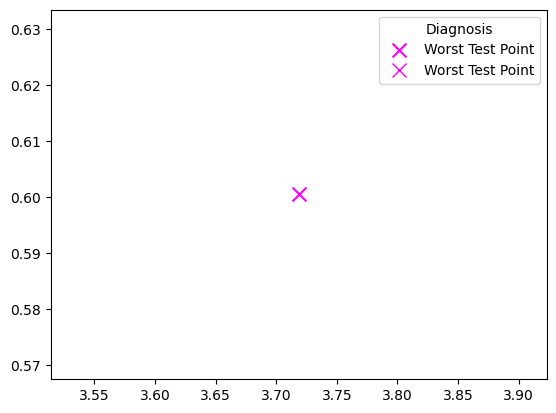

NameError: name 'Z_old' is not defined

In [ ]:
########################################
#Rosenblatt's update
########################################

# Find the index of the largest misclassification error in the testing set
test_worst_index = np.argmax(test_misclassification_error)
print(test_worst_index)

print(np.argmax(test_misclassification_error))
print(np.argmin(test_misclassification_error))

# Get the coordinates of the worst-performing point in the testing set
test_worst_point = X_test[test_worst_index]

# Plot the worst-performing test point
plt.scatter(test_worst_point[0], test_worst_point[1], color='magenta', marker='x', s=100, label='Worst Test Point')

# Update the legend
handles, labels = plt.gca().get_legend_handles_labels()
new_handle = plt.Line2D([0], [0], marker='x', color='magenta', linestyle='', markersize=10, label='Worst Test Point')
handles.append(new_handle)
plt.legend(handles=handles, title='Diagnosis')

# Display the updated plot (if in a separate cell)
plt.show()


alpha = 5
w_new = w + alpha * X_train[test_worst_index, :]

# Store old Z
#Z_old = Z

# Manually calculate the new decision function values (Z_new)
Z = w_new[0] * xx + w_new[1] * yy + b #we just apply the equation: Z_new = w_new[0] * x1 + w_new[1] * x2 + b_new

Z = Z_old

##############################################################
#add the testing set to the plot
##############################################################

# Plot the learned classification boundary (where Z's level = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k', linestyles='--')

# Color the background with a distinct color per class
plt.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, colors=['blue', 'red'])

# Scatter plot of the training data
scatter = plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap='coolwarm',
    edgecolor='k',
    marker='o',
    alpha=0.2
)

# Scatter plot of the testing data
scatter = plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap='gray',
    edgecolor='k',
    marker='o',
    alpha=0.8
)

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='red', markersize=8, label='Malignant (1)'),
    plt.Line2D([0], [0], marker='o', color='g', markerfacecolor='black', markersize=8, label='Benign Test (-1)'),
    plt.Line2D([0], [0], marker='o', color='g', markerfacecolor='white', markersize=8, label='Malignant Test (1)')
]
plt.legend(handles=handles, title='Diagnosis')

plt.title('Training set')
plt.xlabel('Standardized Radius Mean')
plt.ylabel('Standardized Texture Mean')
plt.grid(True)
plt.show()


In [ ]:
# Identify a misclassified point
misclassified_indices = np.where(test_misclassification_error < 0)[0]

if len(misclassified_indices) > 0:
    # Select the first misclassified point (you could choose a different one if you like)
    misclassified_point_index = misclassified_indices[0]

    # Get the coordinates and decision function value of the misclassified point
    misclassified_point = X_test[misclassified_point_index]
    decision_function_value = decision_function_test[misclassified_point_index]

    # Print the information
    print(f"Misclassified point index in test set: {misclassified_point_index}")
    print(f"Coordinates (standardized): {misclassified_point}")
    print(f"Decision function value: {decision_function_value}")

    # Plot the misclassified point
    plt.scatter(misclassified_point[0], misclassified_point[1], color='cyan', marker='D', s=100, label='Misclassified Point')

    # Update the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    new_handle = plt.Line2D([0], [0], marker='D', color='cyan', linestyle='', markersize=10, label='Misclassified Point')
    handles.append(new_handle)
    plt.legend(handles=handles, title='Diagnosis')

    # Show the updated plot
    plt.show()
else:
    print("No misclassified points found in the testing set.")

Predictions: [-1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1
  1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -

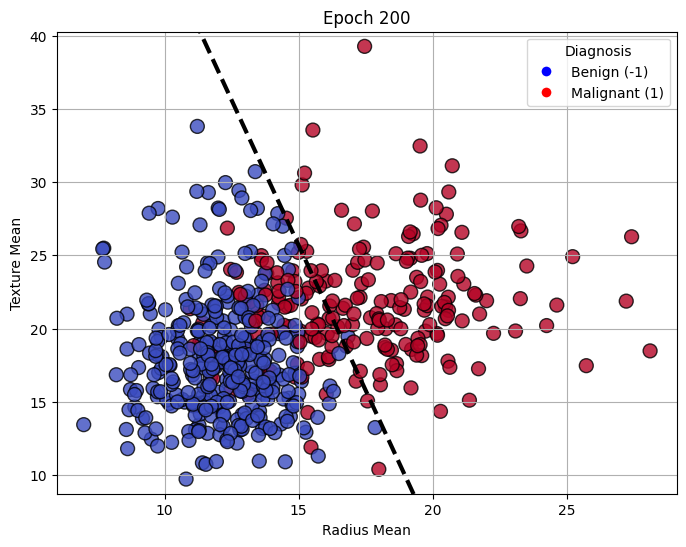

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Modified Perceptron class with weight history recording
class Perceptron:
    def __init__(self, learning_rate=1.0, n_epochs=1000, random_state=1):
        """
        Initialize the perceptron.

        Parameters:
        - learning_rate: step size for weight updates.
        - n_epochs: maximum number of epochs for training.
        - random_state: seed for random weight initialization.
        """
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.weights = None
        self.weights_history = []  # Will store the weight vector after each epoch

    def fit(self, X, y):
        """
        Fit the perceptron model to the training data.

        Parameters:
        - X: array-like, shape = [n_samples, n_features]
             Training vectors.
        - y: array-like, shape = [n_samples]
             Target values (must be +1 or -1).
        """
        n_samples, n_features = X.shape

        # Initialize weights (including bias as weights[0])
        rng = np.random.RandomState(self.random_state)
        self.weights = rng.normal(loc=0.0, scale=0.01, size=n_features + 1)

        for epoch in range(self.n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                # compute the prediction for sample xi
                update = self.learning_rate * (target - self.predict_single(xi))
                # update the weight vector and bias (weights[0] is the bias)
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            # save a copy of the weights after this epoch
            self.weights_history.append(self.weights.copy())
            # optionally, stop if there are no misclassifications
            if errors == 0:
                print(f"converged after {epoch} epochs")
                break
        return self

    def net_input(self, X):
        """Calculate the net input (linear combination plus bias)."""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict_single(self, xi):
        """
        Predict the class label for a single sample.
        Returns 1 if net input is >= 0, else returns -1.
        """
        return 1 if self.net_input(xi) >= 0.0 else -1

    def predict(self, X):
        """
        Predict the class labels for an array of samples.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# ---------------------------
# Prepare simple the dataset
# ---------------------------
# X = np.array([[2, 3],
#               [1, 1],
#               [2, 1],
#               [3, 1],
#               [1, 0],
#               [7, 8],
#               [8, 8],
#               [9, 8],
#               [7, 7],
#               [8, 7]])
# # Class labels: first 5 are -1, last 5 are +1
# y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])


# ---------------------------
# Train the perceptron
# ---------------------------
# Set n_epochs=101 so we have the weight state after epoch 100
ppn = Perceptron(learning_rate=0.1, n_epochs=201)
ppn.fit(X, y)

# (Optional) Print predictions
predictions = ppn.predict(X)
weights = ppn.weights_history[-1]
print("Predictions:", predictions)
print("Weights:", weights)

# ---------------------------
# Set up the plot for animation
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points (colored by class)
scatter = ax.scatter(
    X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.8, marker="o", s=100
)
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Texture Mean")
ax.grid(True)

# Prepare a line object for the decision boundary
(line,) = ax.plot([], [], "--", color="black", lw=3, label="Decision Boundary")
# ax.legend()

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Malignant (1)')
]
ax.legend(handles=handles, title='Diagnosis')

# ---------------------------
# Define the frames we want in the GIF
# ---------------------------
# We want frames at epochs: 10, 15, 20, ... up to 100.
# (Ensure that these indices exist in weights_history)
frames = list(range(10, 201, 5))
# frames = list(range(1, 10, 1)) # use with simpler version

# Initialization function: clear the decision boundary line
def init():
    line.set_data([], [])
    return (line,)


# Update function: update the decision boundary for the given epoch
def update(epoch):
    weights = ppn.weights_history[epoch]
    x_vals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    # Avoid division by zero in case weights[2] is very small
    if np.abs(weights[2]) < 1e-5:
        weights[2] = 1e-5
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Epoch {epoch}")
    return (line,)


# Create the animation
anim = animation.FuncAnimation(
    fig,
    update,
    frames=frames,
    init_func=init,
    blit=True,
    interval=500,  # milliseconds between frames
)

# Save the animation as a GIF (requires Pillow)
anim.save("perceptron_training_intervals.gif", writer="pillow")
plt.show()


<ipython-input-36-974e2bcb27ee>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32).view(-1, 1)


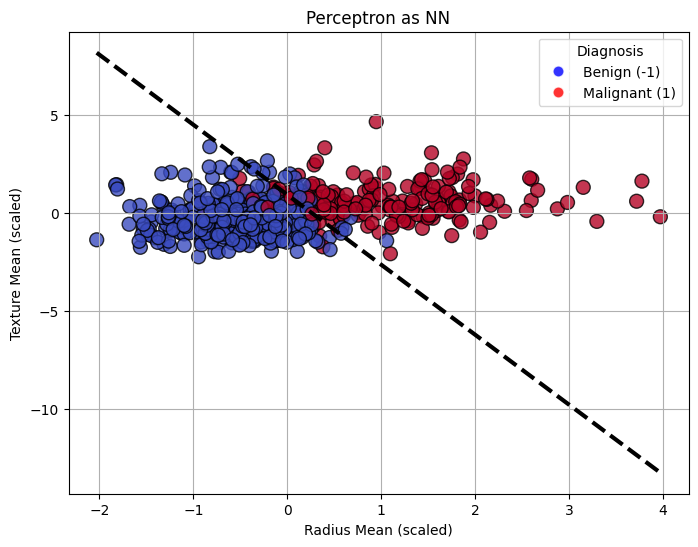

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the Perceptron Model
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.tanh(self.linear(x))  # Activation function

# # Standardize the data (important for correct decision boundary)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Initialize model, loss, and optimizer
model = Perceptron(input_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Train perceptron
for epoch in range(50):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

# Extract learned weights and bias
w = model.linear.weight.data.numpy().flatten()
b = model.linear.bias.data.numpy()

# Plot the data
plt.figure(figsize=(8, 6))
# plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1],  edgecolor="k", alpha=0.6, marker="o", label="Malign (+1)", s=100)
# plt.scatter(X[y[:, 0] == -1][:, 0], X[y[:, 0] == -1][:, 1], edgecolor="k", alpha=0.6, marker="o", label="Benign (-1)", s=100)
plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.8, marker="o", s=100,
)
# Plot decision boundary
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_boundary = (-w[0] * x_boundary - b) / w[1]  # Compute y values

# Legend for the plot
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', alpha = 0.8, markersize=8, label='Benign (-1)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', alpha = 0.8, markersize=8, label='Malignant (1)')
]
plt.legend(handles=handles, title='Diagnosis')

plt.plot(x_boundary, y_boundary, 'k--', lw=3, label="Decision Boundary")
plt.xlabel("Radius Mean (scaled)")
plt.ylabel("Texture Mean (scaled)")
plt.title("Perceptron as NN")
plt.grid(True)
plt.show()
